In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# url ="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



C:\Users\siva7\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\siva7\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\siva7\AppData\Local\Temp\ipykernel_11240\2634517648.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pa

# **Machine Learning Workflow**
- **Problem Statement**
- **Data Gathering**
- **Data Preparation**
- **Exploratory Data Analysis**
- **Model Building**
- **Model Evaluation**
- **Hyper-Parameter Tuning**
- **Prediction on new data**

In [2]:
# load dataset
df = pd.read_csv("expenses.csv")

In [3]:
# print df variable
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Identify Columns data-types and classify them



### Basic Understanding of data


In [5]:
# number of rows and columns in the data
df.shape

(1338, 7)

In [6]:
# information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# check missing values
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# get descriptive view of data
df[['age','bmi','charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [10]:
# find the categories in discrete and categorical data

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
for col in ['sex','children','smoker','region']:
    print(f"Column Name : {col}")
    print(df[col].value_counts())
    print("\n\n")

Column Name : sex
sex
male      676
female    662
Name: count, dtype: int64



Column Name : children
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64



Column Name : smoker
smoker
no     1064
yes     274
Name: count, dtype: int64



Column Name : region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64





# Data Preparation

### outliers Detection

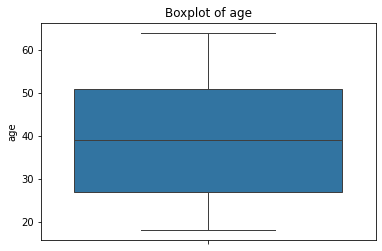

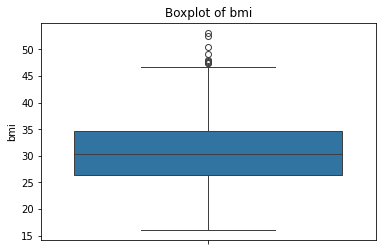

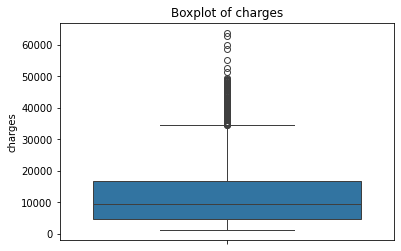

In [13]:
import seaborn as sns

for col in ['age','bmi','charges']:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Handling outliers of charges column

In [14]:
# Calculate IQR
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
iqr

11899.625365

In [15]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(-13109.1508975, 34489.350562499996)

**Find Outliers: Below 𝑄1 − 1.5 × IQR or above 𝑄3 + 1.5 ∗ IQR )**

In [16]:
df[df['charges'] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [17]:
df[df['charges'] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


## What to do with the Outliers
- **Remove the outliers (Trimming)**
- **Replace outlier with upper value (Capping/Winsorization)**

### Missing values Imputation

In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Feature Engineering**

In [22]:
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
num_columns = df.select_dtypes(include=np.number).columns.to_list()
features = df.drop(['charges'], axis=1).columns.to_list()
label = 'charges'
num_columns.remove('charges')

In [23]:
# Combine the transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),
        ('num', RobustScaler(), num_columns)
    ], remainder='passthrough', sparse_threshold=0
)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(X_val.shape)

(856, 6)
(268, 6)
(856,)
(268,)
(214,)
(214, 6)


In [26]:
from sklearn.pipeline import Pipeline
model =  Pipeline([('preprocessor',preprocessor),
                   ('lr', LinearRegression())])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', RobustScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [27]:
# fit the model on training dataset using fit method
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', RobustScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 =  r2_score(y_test, y_pred)

In [31]:
n = len(y_test)
p = len(X_train.columns)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7765512365310385

In [32]:
print("Train/Test Split Result of Linear Regression .... ")
print(f"Mean Absolute Error : {mae:.3f}")
print(f"Mean Squared Error : {mse:.3f}")
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"R-Squared : {r2:.3f}")
print(f"Adjusted R-Squared : {adjusted_r2:.3f}")

Train/Test Split Result of Linear Regression .... 
Mean Absolute Error : 4241.972
Mean Squared Error : 33910583.440
Root Mean Squared Error : 5823.279
R-Squared : 0.782
Adjusted R-Squared : 0.777


### Model evaluation based on K-fold cross-validation using `cross_val_score()` function with` validation data`

In [33]:
model1 =  Pipeline([('preprocessor',preprocessor),
                   ('lr', LinearRegression())])
nmae = cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_mean_absolute_error')
nmse =  cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_mean_squared_error')
nrmse =  cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_root_mean_squared_error')
r2_ =  cross_val_score(model1, X_val, y_val, cv=10, scoring='r2')

In [34]:
print("Cross Validation Result of Linear Regression .... ")
print(f"Mean Absolute Error : {-nmae.mean():.3f}")
print(f"Mean Squared Error : {-nmse.mean():.3f}")
print(f"Root Mean Squared Error : {-nrmse.mean():.3f}")
print(f"R-Squared : {r2_.mean():.3f}")

Cross Validation Result of Linear Regression .... 
Mean Absolute Error : 4902.778
Mean Squared Error : 47246535.866
Root Mean Squared Error : 6737.631
R-Squared : 0.648


### Prediction on new Data